In [24]:
import torch
import matplotlib.pyplot as plt
words = open('names.txt', 'r').read().splitlines()

In [25]:
letters = sorted(list(set(''.join(words))))
str_to_inx = {str:inx+1 for inx, str in enumerate(letters)}
str_to_inx['.'] = 0
inx_to_str = {inx:str for str, inx in str_to_inx.items()}
str_to_inx

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [26]:
#create the training set of bigrams (x,y)
xs, ys = [], []
for w in words[:1]:
    chars = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chars, chars[1:]):
        xi = str_to_inx[ch1]
        yi = str_to_inx[ch2]
        xs.append(xi)
        ys.append(yi)

xs, ys = torch.tensor(xs), torch.tensor(ys)
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [27]:
# one hot encoding integers
import torch.nn.functional as F
x_enc = F.one_hot(xs, num_classes=27).float()
y_enc = F.one_hot(ys, num_classes=27).float()
x_enc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Error in callback <function _draw_all_if_interactive at 0x7fd1f3afc790> (for post_execute):


KeyboardInterrupt: 

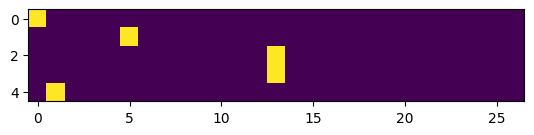

In [28]:
plt.imshow(x_enc)

In [ ]:
W = torch.randn((27, 27))
x_enc @ W

tensor([[-1.1717,  0.5167, -2.1987, -1.0017,  0.8243,  1.6960, -0.1370, -0.7104,
          0.8761,  1.3154,  0.2041,  0.3212,  0.6660, -1.1269, -0.0979, -0.1313,
          1.0487,  0.1452,  0.5457,  1.5847,  0.6086, -1.0828, -1.8032,  0.1239,
          0.5702, -0.2081, -0.9149],
        [-0.2868,  1.4737,  0.4996, -1.2936,  0.1305,  0.5001, -2.8895, -0.3441,
          2.1952, -0.2213,  0.0064, -0.6124,  0.4116,  0.4819, -0.6982, -0.3994,
         -0.1958, -0.0031,  1.0546, -0.8464,  2.3087, -0.3053,  0.0936,  0.6797,
          0.9844, -0.0038, -0.4368],
        [-0.7432,  1.4771,  0.4376,  2.3264,  1.7528,  0.1866, -0.7116,  1.2456,
          0.8936, -0.2394,  0.3375,  0.2217, -1.2613,  0.0611, -0.5338,  0.1063,
         -2.1232,  0.1422,  1.5488, -2.2513,  0.7437,  0.0851,  0.4295,  0.5724,
          0.2855, -0.9446,  0.8359],
        [-0.7432,  1.4771,  0.4376,  2.3264,  1.7528,  0.1866, -0.7116,  1.2456,
          0.8936, -0.2394,  0.3375,  0.2217, -1.2613,  0.0611, -0.5338,  0.1063

In [ ]:
logits = x_enc @ W # log-counts 
counts = logits.exp() # equivalent to N from naive
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0075, 0.0405, 0.0027, 0.0089, 0.0551, 0.1316, 0.0211, 0.0119, 0.0580,
         0.0900, 0.0296, 0.0333, 0.0470, 0.0078, 0.0219, 0.0212, 0.0689, 0.0279,
         0.0417, 0.1178, 0.0444, 0.0082, 0.0040, 0.0273, 0.0427, 0.0196, 0.0097],
        [0.0152, 0.0881, 0.0333, 0.0055, 0.0230, 0.0333, 0.0011, 0.0143, 0.1814,
         0.0162, 0.0203, 0.0109, 0.0305, 0.0327, 0.0100, 0.0135, 0.0166, 0.0201,
         0.0580, 0.0087, 0.2032, 0.0149, 0.0222, 0.0398, 0.0540, 0.0201, 0.0130],
        [0.0090, 0.0825, 0.0292, 0.1928, 0.1086, 0.0227, 0.0092, 0.0654, 0.0460,
         0.0148, 0.0264, 0.0235, 0.0053, 0.0200, 0.0110, 0.0209, 0.0023, 0.0217,
         0.0886, 0.0020, 0.0396, 0.0205, 0.0289, 0.0334, 0.0250, 0.0073, 0.0434],
        [0.0090, 0.0825, 0.0292, 0.1928, 0.1086, 0.0227, 0.0092, 0.0654, 0.0460,
         0.0148, 0.0264, 0.0235, 0.0053, 0.0200, 0.0110, 0.0209, 0.0023, 0.0217,
         0.0886, 0.0020, 0.0396, 0.0205, 0.0289, 0.0334, 0.0250, 0.0073, 0.0434],
        [0.0486, 0.0683,

In [ ]:
# SUMMARY ------------------------------>>>>

In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs hence 27 x 27
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

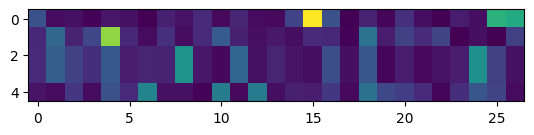

In [ ]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'
plt.imshow(probs)

In [ ]:
probs.shape

torch.Size([5, 27])

In [ ]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {inx_to_str[x]}{inx_to_str[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

In [ ]:
# _---------- OPTIMIZATION -------------

In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs hence 27 x 27
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
print(probs)
loss = -probs[torch.arange(0,5), ys].log().mean() # negative log-likelihood
loss

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

tensor(3.7693, grad_fn=<NegBackward0>)

In [ ]:
probs.shape

torch.Size([5, 27])

In [ ]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()


In [ ]:
W.data += -0.2 * W.grad

In [34]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = str_to_inx[ch1]
    ix2 = str_to_inx[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
input_num = xs.nelement()
print('number of examples: ', input_num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [58]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
for _ in range(500):
    # forward pass
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(input_num), ys].log().mean() # negative log-likelihood
    print(loss)
    
    # backward pass
    W.grad = None
    loss.backward()

    # update
    W.data += -50 * W.grad


tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<NegBackward0>)
tensor(2.4545, grad_fn=<N

In [59]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = ''
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out += inx_to_str[ix]
    if ix == 0:
      break
  print(out)

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
